SMC8 - Test Resuts

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import csv
from matplotlib.cm import get_cmap

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# upload files
csv_file_path = "/home/ibroto/Documents/SMC/proj_SoundField/testData/Aftertest _Questionnaire.csv"
data_afterquestionnaire = pd.read_csv(csv_file_path, usecols=[i for i in range(1,24)], header = 0, names = ['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','GQ1', 'GQ2', 'GQ3', 'GQ4', 'GQ5', 'GQ6', 'GQ7', 'FQ1', 'FQ2', 'FQ3', 'Comments'])
data_afterquestionnaire.rename(columns={"Subject Id\n":"Subject Id"}, inplace=True)

data_afterquestionnaire.head()
csv_file_path1 = "/home/ibroto/Documents/SMC/proj_SoundField/testData/Beforetest_Questionnaire.csv"
data_beforequestionnaire = pd.read_csv(csv_file_path1,usecols=[i for i in range(2,15)],header = 0, names=['Subject Id', 'Group Id', 'Age', 'Gender', 'Nationality', 'OMSI', 'Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7'])
data_beforequestionnaire.loc[data_beforequestionnaire['Task5'] == 0, 'Task5'] = 6



attempts_interactive = data_beforequestionnaire[['Subject Id', 'Group Id', 'Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7']]
csv_file_path3 = "/home/ibroto/Documents/GitHub/smc8-project/Test Data Analysis/followup-test.csv"
attempts_individual = pd.read_csv(csv_file_path3,usecols=[i for i in range(0,8)],header = 0, names=['Subject Id', 'Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7'])
#attempts_individual=attempts_individual.astype(int)


csv_file_path2 = "/home/ibroto/Documents/SMC/proj_SoundField/testData/AlternativeTestQuestionnaire.csv"
data_alternativequestionnaire = pd.read_csv(csv_file_path2,usecols=[i for i in range(1,17)],header = 0, names=['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'FQ1', 'FQ2', 'FQ3', 'Comments'])
data_alternativequestionnaire.head()



merged = data_beforequestionnaire.merge(data_afterquestionnaire, on=['Subject Id', 'Group Id'])

## Task completetioin data

In [97]:
task_complet = attempts_interactive.merge(attempts_individual, on=['Subject Id'],suffixes=['_interact', '_indiv'])
task_complet
for i in range(1,8):
    task_complet[f'diff_Task{i}'] = task_complet[f'Task{i}_interact'] - task_complet[f'Task{i}_indiv']
task_complet.head()

task_complet['avgAttempts_interact'] = task_complet[['Task1_interact', 'Task2_interact','Task3_interact', 'Task4_interact', 'Task5_interact', 'Task6_interact','Task7_interact']].mean(axis=1)
task_complet['avgAttempts_indiv'] = task_complet[['Task1_indiv', 'Task2_indiv', 'Task3_indiv','Task4_indiv', 'Task5_indiv', 'Task6_indiv', 'Task7_indiv']].mean(axis=1)
task_complet['sumAttempts_interact'] = task_complet[['Task1_interact', 'Task2_interact','Task3_interact', 'Task4_interact', 'Task5_interact', 'Task6_interact','Task7_interact']].sum(axis=1)
task_complet['sumAttempts_indiv'] = task_complet[['Task1_indiv', 'Task2_indiv', 'Task3_indiv','Task4_indiv', 'Task5_indiv', 'Task6_indiv', 'Task7_indiv']].sum(axis=1)

task_complet

,Subject Id,Group Id,Task1_interact,Task2_interact,Task3_interact,Task4_interact,Task5_interact,Task6_interact,Task7_interact,Task1_indiv,...,diff_Task2,diff_Task3,diff_Task4,diff_Task5,diff_Task6,diff_Task7,avgAttempts_interact,avgAttempts_indiv,sumAttempts_interact,sumAttempts_indiv
0,1,1,1,1,1,3,6,4,5,1,...,0,-1,-3,0,-2,-1,3.000000,4.000000,21,28
1,2,1,1,1,1,3,6,4,5,1,...,0,-1,1,3,1,3,3.000000,2.000000,21,14
2,3,1,1,1,1,3,6,4,5,1,...,0,-2,0,4,-2,-1,3.000000,3.142857,21,22
3,4,2,1,2,1,2,5,1,2,1,...,1,0,0,4,0,1,2.000000,1.142857,14,8
4,5,2,1,2,1,2,5,1,2,1,...,1,-2,0,0,-5,-4,2.000000,3.428571,14,24
5,6,2,1,2,1,2,5,1,2,1,...,1,0,1,3,-4,-1,2.000000,2.000000,14,14
6,9,3,1,1,1,3,4,4,3,1,...,0,0,2,3,1,-1,2.428571,1.714286,17,12
7,8,3,1,1,1,3,4,4,3,1,...,0,-1,0,-2,-2,-3,2.428571,3.571429,17,25
8,7,3,1,1,1,3,4,4,3,1,...,0,0,1,0,0,-3,2.428571,2.714286,17,19
9,10,4,1,1,1,2,3,2,2,1,...,0,-2,-1,-3,-4,-4,1.714286,3.714286,12,26


## Learning assesment questionaire data

In [98]:
questions = ['Subject Id', 'Group Id', 'FQ1', 'FQ2', 'FQ3']

learn_ass = data_alternativequestionnaire[questions].merge(data_afterquestionnaire[questions], on = ['Subject Id', 'Group Id'], suffixes=['_indiv', '_interact'])


for i in range(1,4):
    learn_ass[f'diff_FQ{i}'] = learn_ass[f'FQ{i}_interact'] - learn_ass[f'FQ{i}_indiv']
    
learn_ass.head()

,Subject Id,Group Id,FQ1_indiv,FQ2_indiv,FQ3_indiv,FQ1_interact,FQ2_interact,FQ3_interact,diff_FQ1,diff_FQ2,diff_FQ3
0,12,4,3,3,5,3,2,3,0,-1,-2
1,5,2,4,3,5,2,4,5,-2,1,0
2,2,1,2,3,5,4,4,5,2,1,0
3,4,2,1,3,4,1,3,5,0,0,1
4,11,4,1,4,4,1,4,2,0,0,-2


## OMSI data processing

In [99]:
omsi_data = data_beforequestionnaire[['Subject Id', 'Group Id', 'OMSI']].copy()

# Create new columns with group-level statistics
omsi_data['OMSI_min'] = omsi_data.groupby('Group Id')['OMSI'].transform('min')
omsi_data['OMSI_max'] = omsi_data.groupby('Group Id')['OMSI'].transform('max')
omsi_data['OMSI_avg'] = omsi_data.groupby('Group Id')['OMSI'].transform('mean')
omsi_data['OMSI_gap'] = omsi_data['OMSI_max']- omsi_data['OMSI_min']

omsi_data

,Subject Id,Group Id,OMSI,OMSI_min,OMSI_max,OMSI_avg,OMSI_gap
0,1,1,157,157,893,407.000000,736
1,2,1,893,157,893,407.000000,736
2,3,1,171,157,893,407.000000,736
3,4,2,816,132,816,380.000000,684
4,5,2,132,132,816,380.000000,684
5,6,2,192,132,816,380.000000,684
6,9,3,96,96,454,216.333333,358
7,8,3,99,96,454,216.333333,358
8,7,3,454,96,454,216.333333,358
9,10,4,99,99,583,349.666667,484


## SUS Score computation

In [100]:
odd_questions = ['Q1', 'Q3', 'Q5', 'Q7', 'Q9']
even_questions = ['Q2', 'Q4', 'Q6', 'Q8', 'Q10']

SUS_data_alt = data_alternativequestionnaire[['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].copy()

for i in odd_questions:
    SUS_data_alt[i] = SUS_data_alt[i]-1


for i in even_questions:
    SUS_data_alt[i] = 5 - SUS_data_alt[i]

SUS_data_alt['SUS'] = SUS_data_alt[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].sum(axis=1)*2.5



SUS_data = data_afterquestionnaire[['Subject Id', 'Group Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].copy()
for i in odd_questions:
    SUS_data[i] = SUS_data[i]-1


for i in even_questions:
    SUS_data[i] = 5 - SUS_data[i]

SUS_data['SUS'] = SUS_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].sum(axis=1)*2.5


print(f"avg SUS: {SUS_data_alt['SUS'].mean()}    std dev SUS: {SUS_data_alt['SUS'].std()}")
print(f"avg SUS: {SUS_data['SUS'].mean()}    std dev SUS: {SUS_data['SUS'].std()}")


SUS_omsi = SUS_data.merge(SUS_data_alt, on=['Subject Id', 'Group Id'], suffixes=['_interact','_indiv'])


for i in range(1,11):
    SUS_omsi[f'diff_Q{i}'] = SUS_omsi[f'Q{i}_interact'] - SUS_omsi[f'Q{i}_indiv']
    
SUS_omsi['SUS_diff'] = SUS_omsi['SUS_interact'] - SUS_omsi['SUS_indiv']


SUS_omsi = omsi_data.merge(SUS_omsi, on=['Subject Id', 'Group Id'])
SUS_omsi['MusicExpert'] = SUS_omsi['OMSI']>500
SUS_omsi.head()

avg SUS: 77.08333333333333    std dev SUS: 19.418633662885075
avg SUS: 65.41666666666667    std dev SUS: 19.212724634439226


,Subject Id,Group Id,OMSI,OMSI_min,OMSI_max,OMSI_avg,OMSI_gap,Q1_interact,Q2_interact,Q3_interact,...,diff_Q3,diff_Q4,diff_Q5,diff_Q6,diff_Q7,diff_Q8,diff_Q9,diff_Q10,SUS_diff,MusicExpert
0,1,1,157,157,893,407.0,736,2,1,2,...,-2,-2,-1,0,-1,-1,-1,0,-27.5,False
1,2,1,893,157,893,407.0,736,2,3,1,...,-3,-2,-2,0,-1,-1,-1,0,-22.5,True
2,3,1,171,157,893,407.0,736,2,3,3,...,0,0,0,-2,0,-1,0,-1,-12.5,False
3,4,2,816,132,816,380.0,684,2,4,4,...,0,0,0,1,0,0,0,0,2.5,True
4,5,2,132,132,816,380.0,684,2,4,3,...,-1,-1,-1,-1,-2,0,0,0,-15.0,False


## Team environment computation

In [101]:
GEQ_data = data_afterquestionnaire[['Subject Id', 'Group Id', 'GQ1', 'GQ2', 'GQ3', 'GQ4', 'GQ5', 'GQ6', 'GQ7']].copy()
normal_score = ["GQ5", "GQ6", "GQ7"]
reverse_score = ['GQ1', "GQ2", "GQ3", "GQ4"]

for i in normal_score:
    GEQ_data[i] = GEQ_data[i]


for i in reverse_score:
    GEQ_data[i] = 6 - GEQ_data[i]

GEQ_data['GEQ_avg'] = GEQ_data[normal_score+reverse_score].mean(axis=1)
GEQ_data['GEQ_sum'] = GEQ_data[normal_score+reverse_score].sum(axis=1)
GEQ_data['GEQ_std'] = GEQ_data[normal_score+reverse_score].std(axis=1)
GEQ_data.head()

,Subject Id,Group Id,GQ1,GQ2,GQ3,GQ4,GQ5,GQ6,GQ7,GEQ_avg,GEQ_sum,GEQ_std
0,3,1,5,4,5,2,5,3,3,3.857143,27,1.214986
1,1,1,3,2,3,3,4,1,4,2.857143,20,1.069045
2,2,1,5,5,5,5,5,3,5,4.714286,33,0.755929
3,5,2,5,4,5,5,5,4,5,4.714286,33,0.487950
4,6,2,5,1,5,5,5,4,5,4.285714,30,1.496026


## Statistical tests

In [102]:
df = GEQ_data.merge(learn_ass,on=['Subject Id', 'Group Id'])
df = SUS_omsi.merge(df, on=['Subject Id', 'Group Id'])
df = task_complet.merge(df, on=['Subject Id', 'Group Id'])

df.columns

Index(['Subject Id', 'Group Id', 'Task1_interact', 'Task2_interact',
       'Task3_interact', 'Task4_interact', 'Task5_interact', 'Task6_interact',
       'Task7_interact', 'Task1_indiv', 'Task2_indiv', 'Task3_indiv',
       'Task4_indiv', 'Task5_indiv', 'Task6_indiv', 'Task7_indiv',
       'diff_Task1', 'diff_Task2', 'diff_Task3', 'diff_Task4', 'diff_Task5',
       'diff_Task6', 'diff_Task7', 'avgAttempts_interact', 'avgAttempts_indiv',
       'sumAttempts_interact', 'sumAttempts_indiv', 'OMSI', 'OMSI_min',
       'OMSI_max', 'OMSI_avg', 'OMSI_gap', 'Q1_interact', 'Q2_interact',
       'Q3_interact', 'Q4_interact', 'Q5_interact', 'Q6_interact',
       'Q7_interact', 'Q8_interact', 'Q9_interact', 'Q10_interact',
       'SUS_interact', 'Q1_indiv', 'Q2_indiv', 'Q3_indiv', 'Q4_indiv',
       'Q5_indiv', 'Q6_indiv', 'Q7_indiv', 'Q8_indiv', 'Q9_indiv', 'Q10_indiv',
       'SUS_indiv', 'diff_Q1', 'diff_Q2', 'diff_Q3', 'diff_Q4', 'diff_Q5',
       'diff_Q6', 'diff_Q7', 'diff_Q8', 'diff_Q9', '

In [124]:


categorical_cols = ['MusicExpert']  # replace with your actual column names
continuous_cols = ['SUS_interact', 'SUS_indiv','SUS_diff',
                   'OMSI', 'OMSI_min', 'OMSI_max', 'OMSI_avg','OMSI_gap',
                   'Task1_interact', 'Task2_interact','Task3_interact', 'Task4_interact', 'Task5_interact', 'Task6_interact','Task7_interact',
                   'Task1_indiv', 'Task2_indiv', 'Task3_indiv','Task4_indiv', 'Task5_indiv', 'Task6_indiv', 'Task7_indiv',
                   'diff_Task1', 'diff_Task2', 'diff_Task3', 'diff_Task4', 'diff_Task5','diff_Task6', 'diff_Task7',
                   'GEQ_avg', 'GEQ_sum',
                   'FQ1_indiv', 'FQ2_indiv', 'FQ3_indiv',
                   'FQ1_interact', 'FQ2_interact', 'FQ3_interact',
                   'diff_FQ1', 'diff_FQ2','diff_FQ3']
#df.columns




In [104]:
import pandas as pd
import scipy.stats as stats
import itertools
import re

custom_groups = {
    'OMSI': ['OMSI', 'OMSI_min', 'OMSI_max', 'OMSI_avg', 'OMSI_gap'],
    'Tasks': ['Task1_interact', 'Task1_indiv', 'diff_Task1',
              'Task2_interact', 'Task2_indiv', 'diff_Task2',
              'Task3_interact', 'Task3_indiv', 'diff_Task3',
              'Task4_interact', 'Task4_indiv', 'diff_Task4',
              'Task5_interact', 'Task5_indiv', 'diff_Task5',
              'Task6_interact', 'Task6_indiv', 'diff_Task6',
              'Task7_interact', 'Task7_indiv', 'diff_Task7'],
    'FQ1': ['FQ1_indiv', 'FQ1_interact', 'diff_FQ1',
            'FQ2_indiv', 'FQ2_interact', 'diff_FQ2',
            'FQ3_indiv', 'FQ3_interact', 'diff_FQ3'],
}

column_to_group = {}
for group, cols in custom_groups.items():
    for col in cols:
        column_to_group[col] = group


def get_base_name(col):
    # Extract base name using regex
    return re.split(r'[_]', col)[0]  # 'Task1_indiv' -> 'Task1'


def is_categorical(series, threshold=10):
    """Heuristic: treat as categorical if dtype is object/category or few unique values."""
    return isinstance("category", pd.CategoricalDtype) or \
           pd.api.types.is_object_dtype(series) or \
           series.nunique() <= threshold


def analyze_relationships(df, categorical_cols, continuous_cols):
    results = []


    # 1. Categorical vs Categorical: Chi-square test
    for col1, col2 in itertools.combinations(categorical_cols, 2):
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p, _, _ = stats.chi2_contingency(contingency)
        results.append({
            'var1': col1, 'var2': col2,
            'type': 'chi2', 'stat': chi2, 'p-value': p
        })

    # 2. Continuous vs Continuous: Pearson correlation
    for col1, col2 in itertools.combinations(continuous_cols, 2):

        if column_to_group.get(col1) == column_to_group.get(col2):
            continue



        corr, p = stats.pearsonr(df[col1], df[col2])
        results.append({
            'var1': col1, 'var2': col2,
            'type': 'pearson', 'stat': corr, 'p-value': p
        })
        
        cat_var1 = is_categorical(df[col1])
        cat_var2 = is_categorical(df[col2])
        if cat_var1 and cat_var2:
            contingency = pd.crosstab(df[col1], df[col2])
            chi2, p, _, _ = stats.chi2_contingency(contingency)
            results.append({
                'var1': col1, 'var2': col2,
                'type': 'chi2', 'stat': chi2, 'p-value': p
            })

    # 3. Categorical vs Continuous: ANOVA
    for cat in categorical_cols:
        for cont in continuous_cols:
            groups = [df[cont][df[cat] == level] for level in df[cat].dropna().unique()]
            f_stat, p = stats.f_oneway(*groups)
            results.append({
                'var1': cat, 'var2': cont,
                'type': 'anova', 'stat': f_stat, 'p-value': p
            })

    return pd.DataFrame(results)


In [105]:
results_df = analyze_relationships(df, categorical_cols, continuous_cols)
print(results_df.sort_values('p-value'))
results_df.sort_values('p-value').to_csv('./GlobalStats.csv')
results_df.sort_values('p-value')[results_df['p-value'] < 0.05].dropna()



/tmp/ipykernel_19749/461137910.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = stats.pearsonr(df[col1], df[col2])
/tmp/ipykernel_19749/461137910.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = stats.pearsonr(df[col1], df[col2])
/tmp/ipykernel_19749/461137910.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = stats.pearsonr(df[col1], df[col2])
/tmp/ipykernel_19749/461137910.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = stats.pearsonr(df[col1], df[col2])
/tmp/ipykernel_19749/461137910.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = stats.pearsonr(df[col1], df[col2])
/tmp/ipykernel_19749/461137910.py:59: ConstantInputWarning: An input array is constant; the correlation c

             var1            var2     type       stat   p-value
247      OMSI_min  Task5_interact  pearson   0.934303  0.000009
440      OMSI_gap  Task5_interact     chi2  36.000000  0.000040
312      OMSI_max  Task5_interact     chi2  36.000000  0.000040
376      OMSI_avg  Task5_interact     chi2  36.000000  0.000040
248      OMSI_min  Task5_interact     chi2  36.000000  0.000040
...           ...             ...      ...        ...       ...
1001  MusicExpert  Task1_interact    anova        NaN       NaN
1003  MusicExpert  Task3_interact    anova        NaN       NaN
1008  MusicExpert     Task1_indiv    anova        NaN       NaN
1009  MusicExpert     Task2_indiv    anova        NaN       NaN
1015  MusicExpert      diff_Task1    anova        NaN       NaN

[1033 rows x 5 columns]


/home/ibroto/anaconda3/envs/SPIS_baseline/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_19749/741735233.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_df.sort_values('p-value')[results_df['p-value'] < 0.05].dropna()


,var1,var2,type,stat,p-value
247,OMSI_min,Task5_interact,pearson,0.934303,0.000009
440,OMSI_gap,Task5_interact,chi2,36.000000,0.000040
312,OMSI_max,Task5_interact,chi2,36.000000,0.000040
376,OMSI_avg,Task5_interact,chi2,36.000000,0.000040
248,OMSI_min,Task5_interact,chi2,36.000000,0.000040
...,...,...,...,...,...
356,OMSI_max,FQ1_interact,chi2,17.333333,0.043745
781,Task7_indiv,GEQ_avg,pearson,-0.586000,0.045252
783,Task7_indiv,GEQ_sum,pearson,-0.586000,0.045252
31,SUS_interact,Task5_indiv,pearson,-0.583731,0.046298


In [106]:
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon

def compare_paired_series(df):
    results = []

    # Find base names shared by both *_indiv and *_interact
    indiv_cols = [col for col in df.columns if col.endswith('_indiv')]
    interact_cols = [col for col in df.columns if col.endswith('_interact')]

    # Create sets of base names
    indiv_bases = {col.replace('_indiv', '') for col in indiv_cols}
    interact_bases = {col.replace('_interact', '') for col in interact_cols}

    shared_bases = indiv_bases & interact_bases

    for base in sorted(shared_bases):
        col_indiv = f'{base}_indiv'
        col_interact = f'{base}_interact'

        s1 = df[col_interact].dropna()
        s2 = df[col_indiv].dropna()

        # Make sure they're aligned (drop NAs at same indexes)
        common_index = df[[col_interact, col_indiv]].dropna().index
        s1 = df.loc[common_index, col_interact]
        s2 = df.loc[common_index, col_indiv]

        # Paired t-test
        t_stat, t_p = ttest_rel(s1, s2)

        # Wilcoxon test (two-sided)
        try:
            w_stat, w_p = wilcoxon(s1, s2)
        except ValueError:
            w_stat, w_p = None, None  # Wilcoxon can fail if all differences are zero

        results.append({
            'base_variable': base,
            't_stat': t_stat, 't_p_value': t_p,
            'wilcoxon_stat': w_stat, 'wilcoxon_p_value': w_p
        })

    return pd.DataFrame(results)


In [111]:
df[['avgAttempts_interact', 'avgAttempts_indiv',
       'sumAttempts_interact', 'sumAttempts_indiv']]

,avgAttempts_interact,avgAttempts_indiv,sumAttempts_interact,sumAttempts_indiv
0,3.000000,4.000000,21,28
1,3.000000,2.000000,21,14
2,3.000000,3.142857,21,22
3,2.000000,1.142857,14,8
4,2.000000,3.428571,14,24
5,2.000000,2.000000,14,14
6,2.428571,1.714286,17,12
7,2.428571,3.571429,17,25
8,2.428571,2.714286,17,19
9,1.714286,3.714286,12,26


In [107]:
paired_series_tests = compare_paired_series(df)
paired_series_tests.to_csv('paired_series_tests.csv')
paired_series_tests

/home/ibroto/anaconda3/envs/SPIS_baseline/lib/python3.10/site-packages/scipy/stats/_wilcoxon.py:172: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se


In [158]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams.update({'font.size': 10})

def check_manual_categorization(var_name):
    return var_name in ['MusicExpert'] #add more if want tot try as categorical

def is_categorical(series, threshold=10):
    """Heuristic: treat as categorical if dtype is object/category or few unique values."""
    return pd.api.types.is_categorical_dtype(series) or \
           pd.api.types.is_object_dtype(series) or \
           series.nunique() <= threshold

def auto_plot_relationship(df, var1, var2):
    x = df[var1]
    y = df[var2]

    # Detect variable types
    var1_cat = is_categorical(x)
    var2_cat = is_categorical(y)

    manual_var1_cat = check_manual_categorization(var1)
    manual_var2_cat = check_manual_categorization(var2)

    # Plot
    plt.figure(figsize=(15, 10))

    if (not var1_cat and not var2_cat) or (not manual_var1_cat and not manual_var2_cat):
        # Continuous vs Continuous
        sns.lmplot(data=df, x=var1, y=var2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
        plt.title(f'Scatter plot with regression: {var1} vs {var2}')
        plt.tight_layout()
        plt.show()

    if var1_cat and not var2_cat:
        # Categorical vs Continuous
        sns.boxplot(data=df, x=var1, y=var2)
        plt.title(f'Boxplot: {var2} by {var1}')
        plt.tight_layout()
        plt.show()

    elif not var1_cat and var2_cat:
        # Continuous vs Categorical (swap for boxplot)
        sns.boxplot(data=df, x=var2, y=var1)
        plt.title(f'Boxplot: {var1} by {var2}')
        plt.tight_layout()
        plt.show()

    else:
        # Categorical vs Categorical
        ct = pd.crosstab(df[var1], df[var2], normalize='index')
        sns.heatmap(ct, annot=True, cmap='Blues')
        plt.title(f'Heatmap: {var1} vs {var2}')
        plt.tight_layout()
        plt.show()

        # Optional: mosaic plot
        if manual_var1_cat or manual_var2_cat:
            print("Showing mosaic plot as well...")
            mosaic(df, [var1, var2])
            plt.title(f'Mosaic: {var1} vs {var2}')
            plt.show()


              var1          var2     type   p-value
31    SUS_interact   Task5_indiv  pearson  0.046298
45    SUS_interact    diff_Task5  pearson  0.037690
61    SUS_interact  FQ3_interact  pearson  0.015348
67    SUS_interact      diff_FQ3  pearson  0.017427
219           OMSI   Task6_indiv  pearson  0.002992
...            ...           ...      ...       ...
1021   MusicExpert    diff_Task7    anova  0.000911
1022   MusicExpert       GEQ_avg    anova  0.030031
1023   MusicExpert       GEQ_sum    anova  0.030031
1024   MusicExpert     FQ1_indiv    anova  0.001570
1030   MusicExpert      diff_FQ1    anova  0.032701

[77 rows x 4 columns]


/tmp/ipykernel_19749/824462473.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 1500x1000 with 0 Axes>

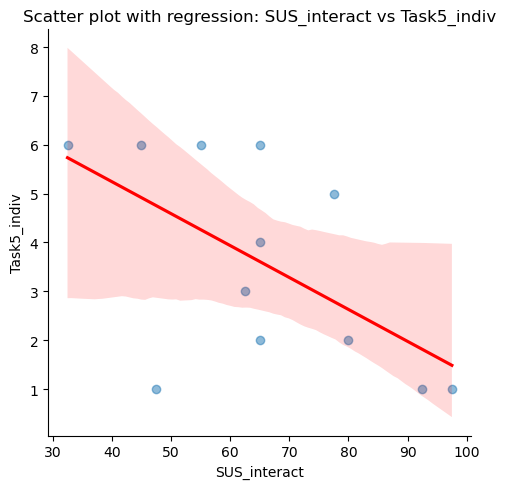

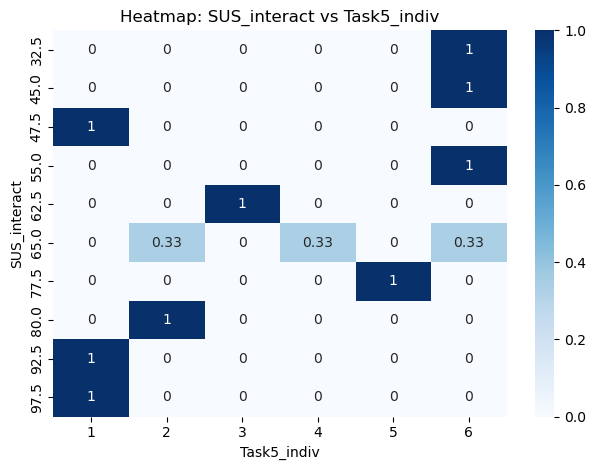

In [159]:
significant = results_df[results_df['p-value'] < 0.05]
print(significant[['var1', 'var2', 'type', 'p-value']])
for (idx, row) in significant[:1].iterrows():
    auto_plot_relationship(df, row.var1, row.var2)

<Figure size 2000x1000 with 0 Axes>

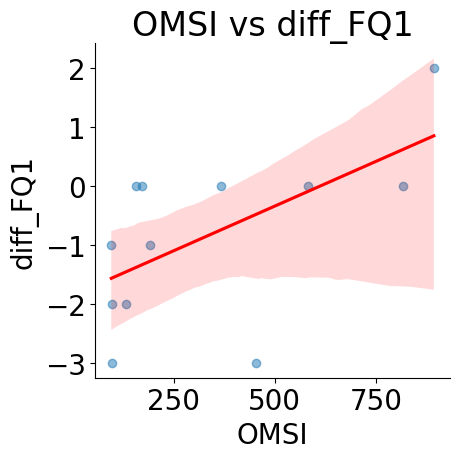

In [164]:
plt.rcParams.update({'font.size': 20})
var1 = 'OMSI'
var2 = 'diff_FQ1'
plt.figure(figsize=(20, 10))

sns.lmplot(data=df, x=var1, y=var2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title(f'{var1} vs {var2}')
plt.tight_layout()
plt.show()

In [152]:
results_df[results_df['var1'].isin(['SUS_interact'])].to_csv('SUS_interact_statistics.csv')

In [142]:
SUS_results = pd.concat([
    results_df[results_df['var1'].isin(['SUS_interact'])],
    results_df[results_df['var1'].isin(['SUS_indiv'])],
    results_df[results_df['var1'].isin(['SUS_diff'])]
    ])#.to_csv('SUS_stats.csv')

SUS_results = SUS_results[SUS_results['type'] == 'pearson']
SUS_results.set_index(['var1', 'var2'], inplace=True)
SUS_results.to_csv('SUS_statistics.csv')
SUS_results

type      stat   p-value
var1         var2                                     
SUS_interact OMSI          pearson -0.001544  0.996200
             OMSI_min      pearson  0.054533  0.866327
             OMSI_max      pearson  0.029054  0.928580
             OMSI_avg      pearson -0.241065  0.450381
             OMSI_gap      pearson  0.024611  0.939484
...                            ...       ...       ...
SUS_diff     FQ2_interact  pearson  0.406695  0.189519
             FQ3_interact  pearson  0.236547  0.459173
             diff_FQ1      pearson -0.086585  0.789036
             diff_FQ2      pearson  0.489650  0.106137
             diff_FQ3      pearson  0.511440  0.089217

[105 rows x 3 columns]

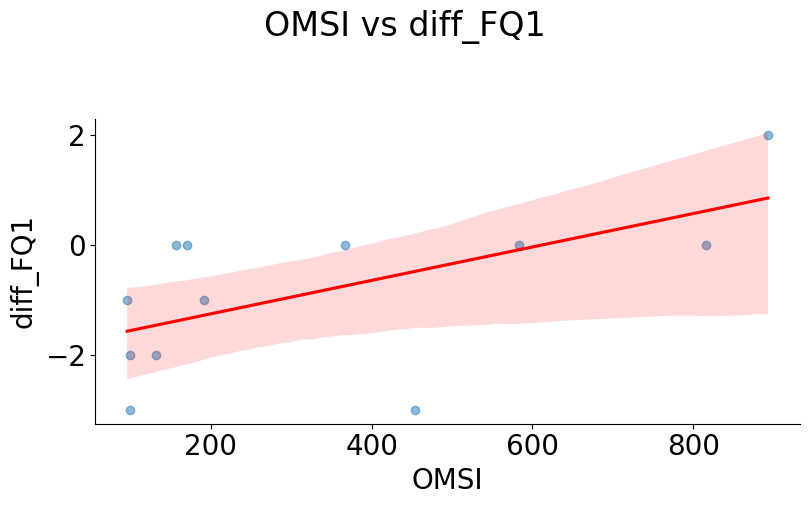

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})
var1 = 'OMSI'
var2 = 'diff_FQ1'

# height is the height in inches, aspect is width / height
g = sns.lmplot(
    data=df, 
    x=var1, 
    y=var2, 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'red'},
    height=5,       # height in inches
    aspect=1.7         # width = height * aspect => 10 * 2 = 20 inches
)

g.fig.suptitle(f'{var1} vs {var2}', y=1.03)  # Move title above the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_19749/2464439101.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(series) or \


<Figure size 800x600 with 0 Axes>

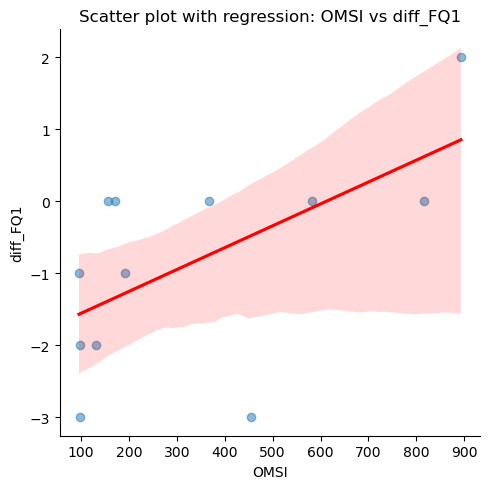

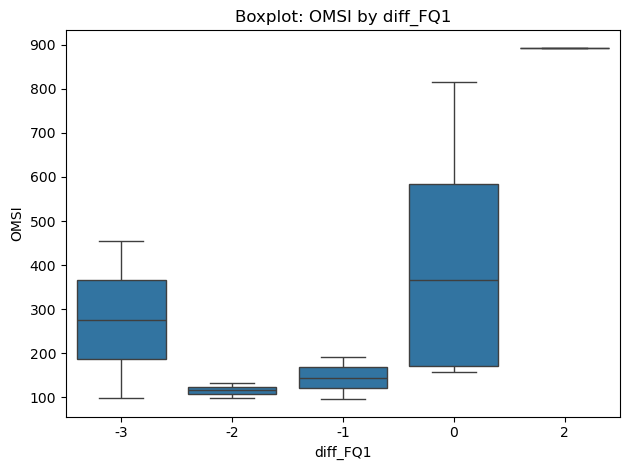

In [153]:
auto_plot_relationship(df,'OMSI', 'diff_FQ1')

In [ ]:
import statsmodels.api as sm

X = df[['OMSI', '']]
y = df['SUS_diff']

X = sm.add_constant(X)  # adds intercept term
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               SUS_diff   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                 -0.498
Method:                 Least Squares   F-statistic:                    0.5431
Date:                Thu, 22 May 2025   Prob (F-statistic):              0.782
Time:                        13:26:18   Log-Likelihood:                -45.341
No. Observations:                  12   AIC:                             108.7
Df Residuals:                       3   BIC:                             113.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.8296     90.096     -0.464      0.6

/home/ibroto/anaconda3/envs/SPIS_baseline/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


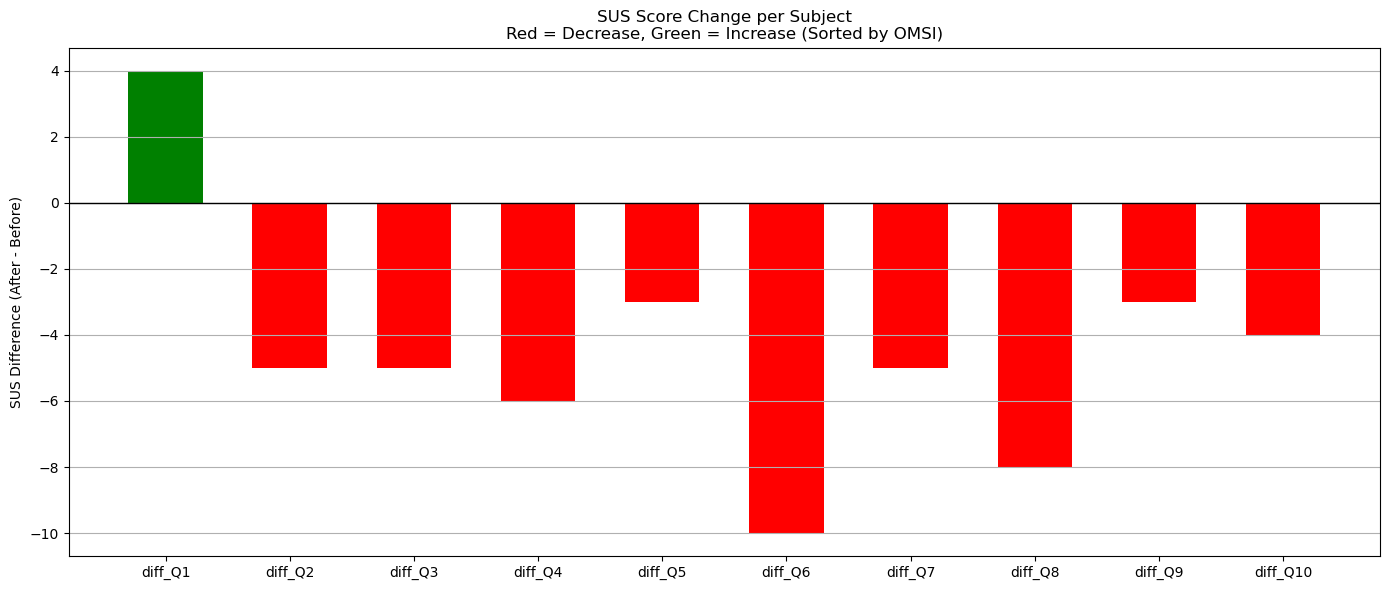

In [100]:
difference = SUS_omsi[['diff_Q1', 'diff_Q2', 'diff_Q3', 'diff_Q4', 'diff_Q5', 'diff_Q6', 'diff_Q7', 'diff_Q8', 'diff_Q9', 'diff_Q10']].sum()
##SUS_omsi[['diff_Q1', 'diff_Q2', 'diff_Q3', 'diff_Q4', 'diff_Q5', 'diff_Q6', 'diff_Q7', 'diff_Q8', 'diff_Q9', 'diff_Q10']].mean()

# 4. Define colors: green if SUS_diff >= 0, else red
colors = ['green' if diff >= 0 else 'red' for diff in difference]

# 5. Plot
plt.figure(figsize=(14, 6))
plt.bar(
    difference.keys(),
    difference.values,
    color=colors,
    width=0.6
)


# 7. Add labels and grid
plt.axhline(0, color='black', linewidth=1)
plt.ylabel("SUS Difference (After - Before)")
plt.title("SUS Score Change per Subject\nRed = Decrease, Green = Increase (Sorted by OMSI)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [173]:
SUS_omsi_overview = SUS_omsi[['Subject Id', 'Group Id', 'MusicExpert', 'OMSI', 'SUS_interact', 'SUS_indiv']].copy()
SUS_omsi_overview['SUS_diff'] = SUS_omsi['SUS_interact'] - SUS_omsi['SUS_indiv']
SUS_learning = SUS_omsi_overview.merge(data_afterquestionnaire[['Subject Id','GQ1','GQ2', 'GQ3', 'GQ4', 'GQ5', 'GQ6', 'GQ7', 'FQ1', 'FQ2', 'FQ3']], on='Subject Id')
SUS_learning['target'] = SUS_learning['SUS_diff'] > 0


In [175]:
a = SUS_learning.groupby('target')
[group['FQ1'].values for name, group in SUS_learning.groupby('target')]


[array([4, 4, 4, 2, 3, 2, 2, 3, 1]), array([1, 1, 3])]

In [176]:

import pandas as pd
from scipy.stats import f_oneway

# Separate the scores by group
grouped_scores = [group['FQ1'].values for name, group in SUS_learning.groupby('target')]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*grouped_scores)

print("FQ1")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Separate the scores by group
grouped_scores = [group['FQ2'].values for name, group in SUS_learning.groupby('target')]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*grouped_scores)

print("FQ2")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


# Separate the scores by group
grouped_scores = [group['FQ3'].values for name, group in SUS_learning.groupby('target')]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*grouped_scores)

print("FQ3")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")




FQ1
F-statistic: 2.2727
P-value: 0.1626
FQ2
F-statistic: 1.2500
P-value: 0.2897
FQ3
F-statistic: 0.6010
P-value: 0.4562


In [177]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA


# Run MANOVA
maov = MANOVA.from_formula('GQ1 + GQ2 + GQ3 + GQ4 + GQ5 + GQ6 + GQ7 ~ target', data=SUS_learning)
print(maov.mv_test())


                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0036 7.0000 4.0000 159.5630 0.0001
         Pillai's trace   0.9964 7.0000 4.0000 159.5630 0.0001
 Hotelling-Lawley trace 279.2353 7.0000 4.0000 159.5630 0.0001
    Roy's greatest root 279.2353 7.0000 4.0000 159.5630 0.0001
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
            target         Value  Num DF Den DF F Value Pr > F
--------------------------------------------------------------
             Wilks' lambda 0.3923 7.0000 4.0000  0.8853 0.5848
            Pillai's trace 0.6077 7.0000 4.0000  0.8853 0.5848
    Hotelli

/home/ibroto/anaconda3/envs/SPIS_baseline/lib/python3.10/site-packages/statsmodels/multivariate/multivariate_ols.py:216: RuntimeWarning: divide by zero encountered in scalar divide
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)
/home/ibroto/anaconda3/envs/SPIS_baseline/lib/python3.10/site-packages/statsmodels/multivariate/multivariate_ols.py:216: RuntimeWarning: divide by zero encountered in scalar divide
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [178]:
from scipy.stats import pearsonr

r, p = pearsonr(SUS_learning['target'], SUS_learning['GQ6'])
print(f"Correlation: {r:.2f}, P-value: {p:.4f}")


Correlation: -0.59, P-value: 0.0437


In [179]:

# Melt dataframe to long format
df_long_SUS = SUS_omsi.melt(id_vars=['Subject Id'], value_vars=['SUS_interact', 'SUS_indiv'],value_name='SUS')

df_long_SUS = df_long_SUS.merge(SUS_omsi_overview[['Subject Id', 'MusicExpert', 'OMSI', 'SUS_diff']], on = 'Subject Id')



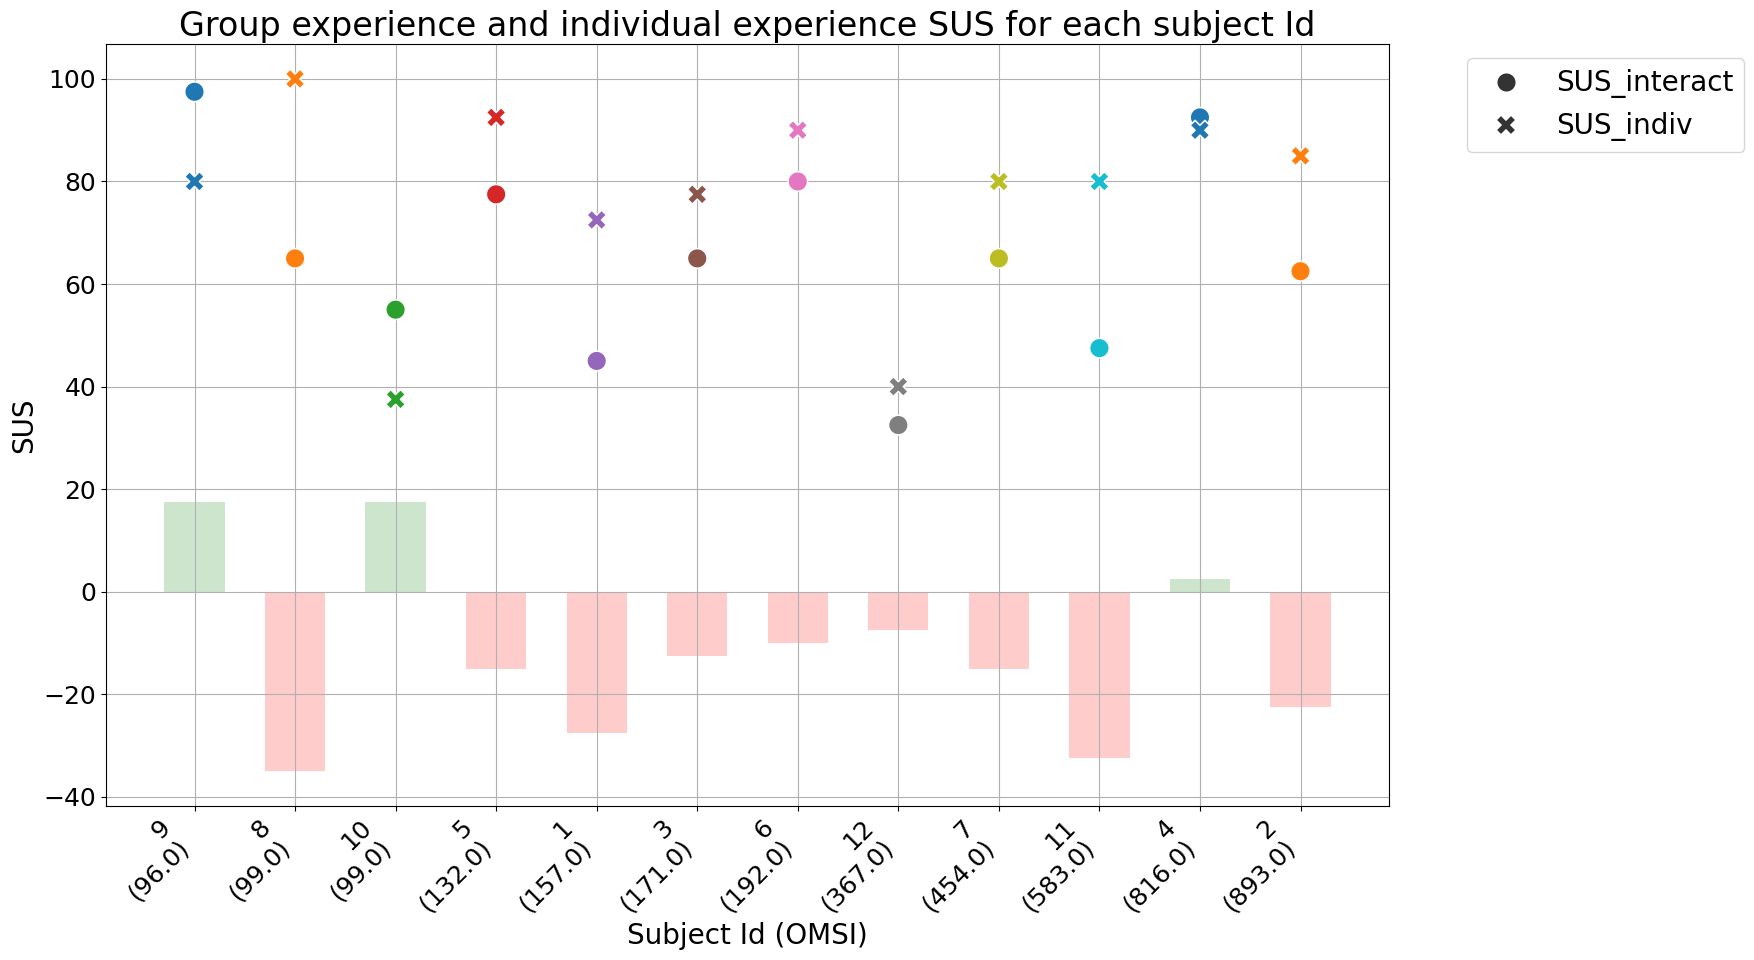

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map subject IDs to x positions
#subject_order = df_long_SUS['Subject Id'].unique()
#subject_to_x = {subj: i for i, subj in enumerate(subject_order)}
#df_long_SUS['x_pos'] = df_long_SUS['Subject Id'].map(subject_to_x)
#df_bars = df_long_SUS.drop_duplicates('Subject Id')



# 1. Get one row per subject for SUS_diff and OMSI
df_bars = df_long_SUS.drop_duplicates('Subject Id').copy()

# 2. Sort subjects by OMSI score
df_bars = df_bars.sort_values('OMSI')
subject_order = df_bars['Subject Id'].tolist()

# Apply ordering to df_long_SUS
df_long_SUS['Subject Id'] = pd.Categorical(df_long_SUS['Subject Id'], categories=subject_order, ordered=True)

# 3. Get x positions for each subject
x_positions = np.arange(len(subject_order))

# 4. Map each subject to x position
subject_to_x = dict(zip(subject_order, x_positions))
df_long_SUS['x_pos'] = df_long_SUS['Subject Id'].map(subject_to_x)
df_bars['x_pos'] = df_bars['Subject Id'].map(subject_to_x)



plt.figure(figsize=(18, 10))




# Background bars
colors = df_bars['SUS_diff'].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar(
    df_bars['x_pos'],
    df_bars['SUS_diff'],
    color=colors,
    alpha=0.2,
    width=0.6,
    zorder=0
)

# Scatterplot: colored by Subject Id (hue), shaped by variable (style)
# But we'll manually remove the hue legend later
plot = sns.scatterplot(
    data=df_long_SUS,
    x='x_pos',
    y='SUS',
    hue='Subject Id',
    style='variable',
    palette='tab10',
    s=200,
    zorder=2
)

# Remove hue legend (keep only shape)
handles, labels = plot.get_legend_handles_labels()
# Get only unique shapes (for 'variable')
unique_vars = df_long_SUS['variable'].unique()
shape_legend = [(h, l) for h, l in zip(handles, labels) if l in unique_vars]
shape_handles, shape_labels = zip(*shape_legend)

plt.legend(shape_handles, shape_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Custom x-axis labels: Subject Id + OMSI below
xtick_labels = [f"{sid}\n({omsi:.1f})" for sid, omsi in zip(df_bars['Subject Id'], df_bars['OMSI'])]
plt.xticks(ticks=x_positions, labels=xtick_labels, rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)

# Axis, grid, layout
#plt.xticks(list(subject_to_x.values()), list(subject_to_x.keys()), rotation=45)
plt.xlabel("Subject Id (OMSI)")
plt.ylabel("SUS")
plt.title("Group experience and individual experience SUS for each subject Id")
plt.grid(True, zorder=1)
plt.tight_layout()
plt.show()


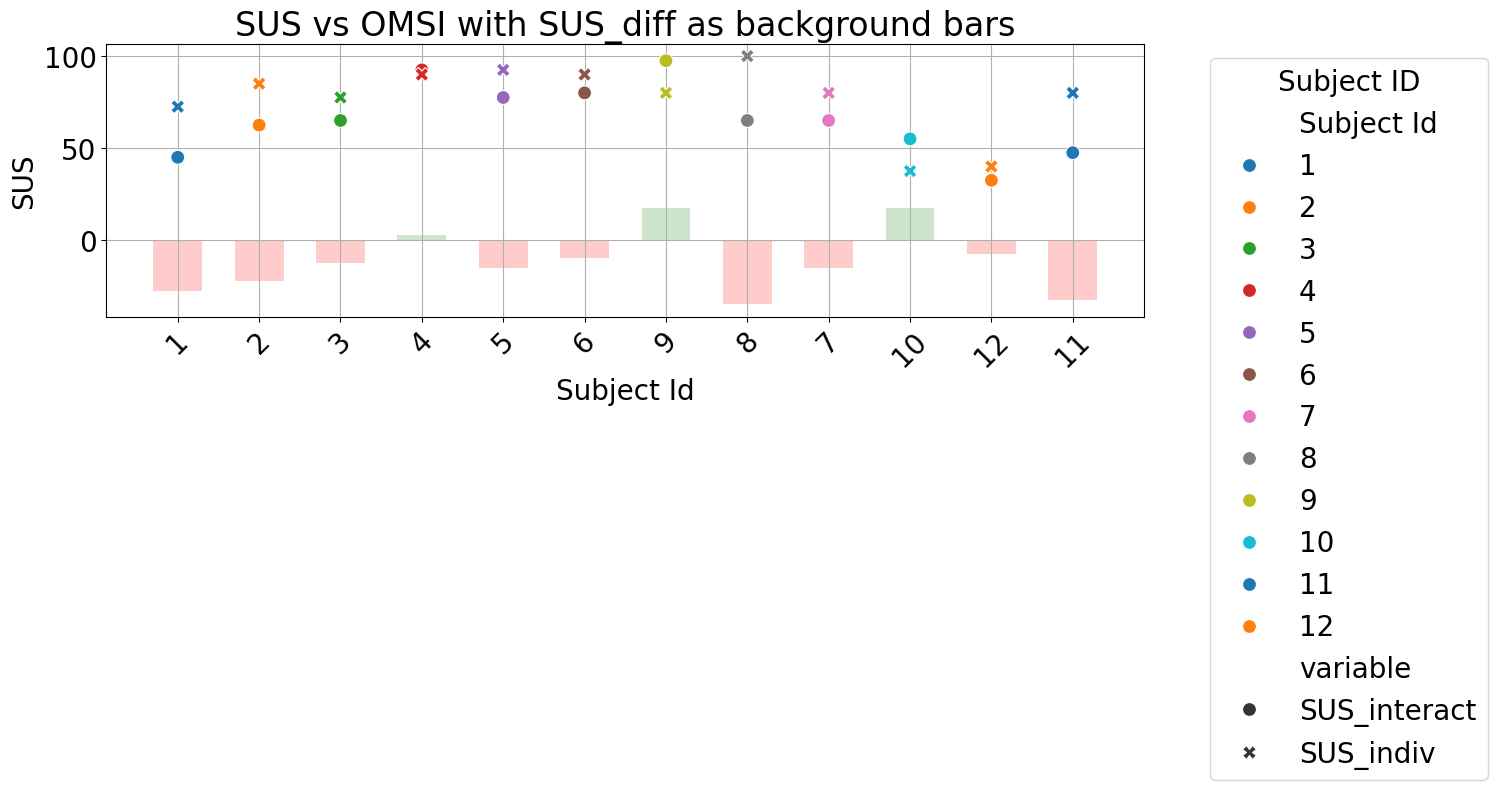

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_long_SUS has columns: 'Subject Id', 'OMSI', 'SUS', 'variable', 'SUS_diff'
# Create an ID-to-position mapping for consistent bar placement
subject_order = df_long_SUS['Subject Id'].unique()
subject_to_x = {subj: i for i, subj in enumerate(subject_order)}

# Add x position column
df_long_SUS['x_pos'] = df_long_SUS['Subject Id'].map(subject_to_x)

# Compute SUS_diff per participant
# If it's already computed in 'SUS_diff', skip this step
# df_diff = df_long_SUS.groupby('Subject Id')['SUS'].diff().dropna()

# Get one row per subject for the bars
df_bars = df_long_SUS.drop_duplicates('Subject Id')

# Plot
plt.figure(figsize=(12, 6))

# 1. Background bars (SUS_diff)
colors = df_bars['SUS_diff'].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar(
    df_bars['x_pos'], 
    df_bars['SUS_diff'], 
    color=colors, 
    alpha=0.2, 
    width=0.6, 
    zorder=0
)

# 2. Scatterplot on top
sns.scatterplot(
    data=df_long_SUS,
    x='x_pos',
    y='SUS',
    hue='Subject Id',
    style='variable',
    palette='tab10',
    s=100,
    zorder=2,
    #legend = False
)

# Axis labels and ticks
plt.xticks(list(subject_to_x.values()), list(subject_to_x.keys()), rotation=45)
plt.xlabel("Subject Id")
plt.ylabel("SUS")
plt.title("SUS vs OMSI with SUS_diff as background bars")
plt.grid(True, zorder=1)
plt.tight_layout()

# Fix legend
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


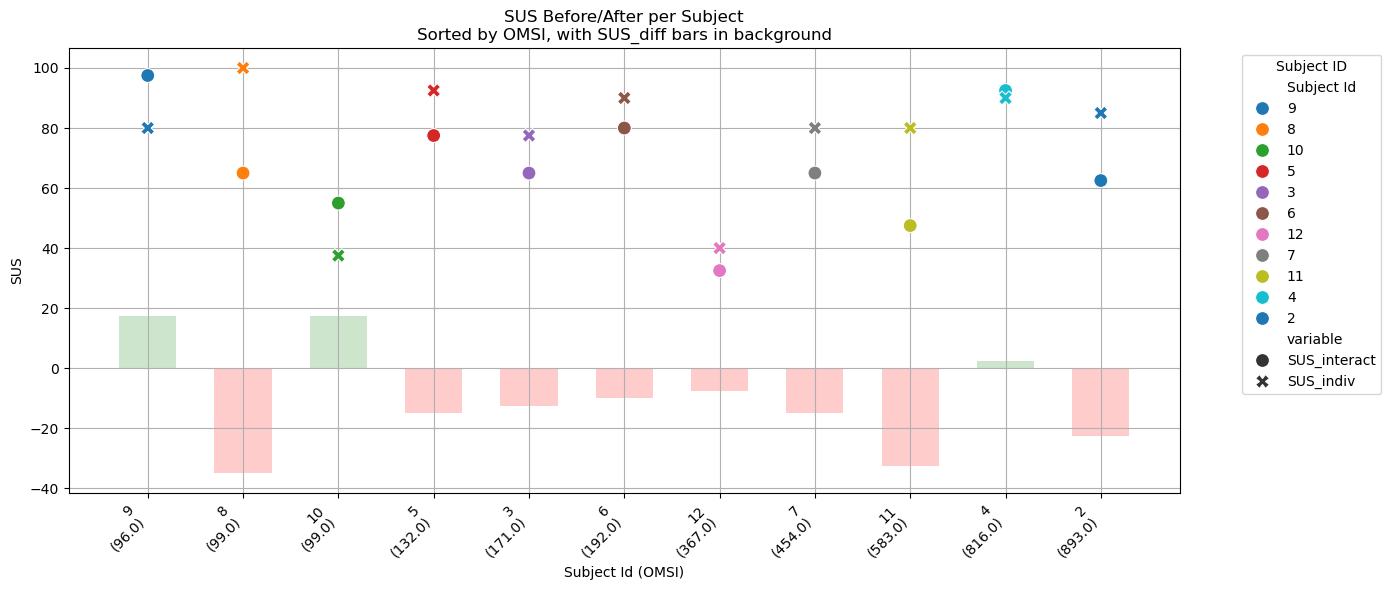

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Get one row per subject for SUS_diff and OMSI
df_bars = df_long_SUS.drop_duplicates('Subject Id').copy()

# 2. Sort subjects by OMSI score
df_bars = df_bars.sort_values('OMSI')
subject_order = df_bars['Subject Id'].tolist()

# Apply ordering to df_long_SUS
df_long_SUS['Subject Id'] = pd.Categorical(df_long_SUS['Subject Id'], categories=subject_order, ordered=True)

# 3. Get x positions for each subject
x_positions = np.arange(len(subject_order))

# 4. Map each subject to x position
subject_to_x = dict(zip(subject_order, x_positions))
df_long_SUS['x_pos'] = df_long_SUS['Subject Id'].map(subject_to_x)
df_bars['x_pos'] = df_bars['Subject Id'].map(subject_to_x)

# 5. Plot
plt.figure(figsize=(14, 6))

# Background bars based on SUS_diff
colors = df_bars['SUS_diff'].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar(
    df_bars['x_pos'], 
    df_bars['SUS_diff'], 
    color=colors, 
    alpha=0.2, 
    width=0.6, 
    zorder=0
)

# Scatterplot
sns.scatterplot(
    data=df_long_SUS,
    x='x_pos',
    y='SUS',
    hue='Subject Id',
    style='variable',
    palette='tab10',
    s=100,
    zorder=2,
    #legend=False  # optional, since IDs are now on the x-axis
)

# Custom x-axis labels: Subject Id + OMSI below
xtick_labels = [f"{sid}\n({omsi:.1f})" for sid, omsi in zip(df_bars['Subject Id'], df_bars['OMSI'])]
plt.xticks(ticks=x_positions, labels=xtick_labels, rotation=45, ha='right')

plt.xlabel("Subject Id (OMSI)")
plt.ylabel("SUS")
plt.title("SUS Before/After per Subject\nSorted by OMSI, with SUS_diff bars in background")
plt.grid(True, zorder=1)
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
# Set heatmap with discrete levels from 1 to 5
sns.heatmap(
    data_groupenvironment,
    annot=True,
    cmap="YlGnBu",
    cbar=True,
    vmin=1,
    vmax=5,
    linewidths=0.5,
    linecolor='white',
    square=True
)

# Set colorbar ticks to only show integers 1–5
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticks([1, 2, 3, 4, 5])
colorbar.set_ticklabels([1, 2, 3, 4, 5])

plt.yticks(ticks=np.arange(len(data_groupenvironment)) + 0.5,
           labels=np.arange(1, len(data_groupenvironment) + 1),
           rotation=0)

# Label formatting
plt.title("Group Retrieval Something")
plt.ylabel("ID", rotation=0)

# Show the plot

plt.show()



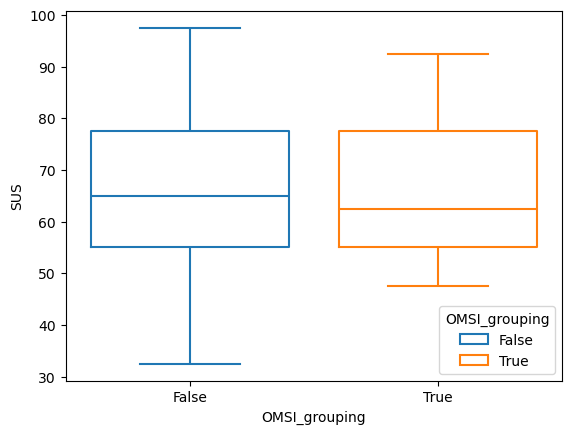

In [11]:
SUS_omsi['OMSI_grouping'] = SUS_omsi['OMSI']>=500
ax = sns.boxplot(x="OMSI_grouping", y="SUS", hue="OMSI_grouping", data=SUS_omsi, fill=False)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

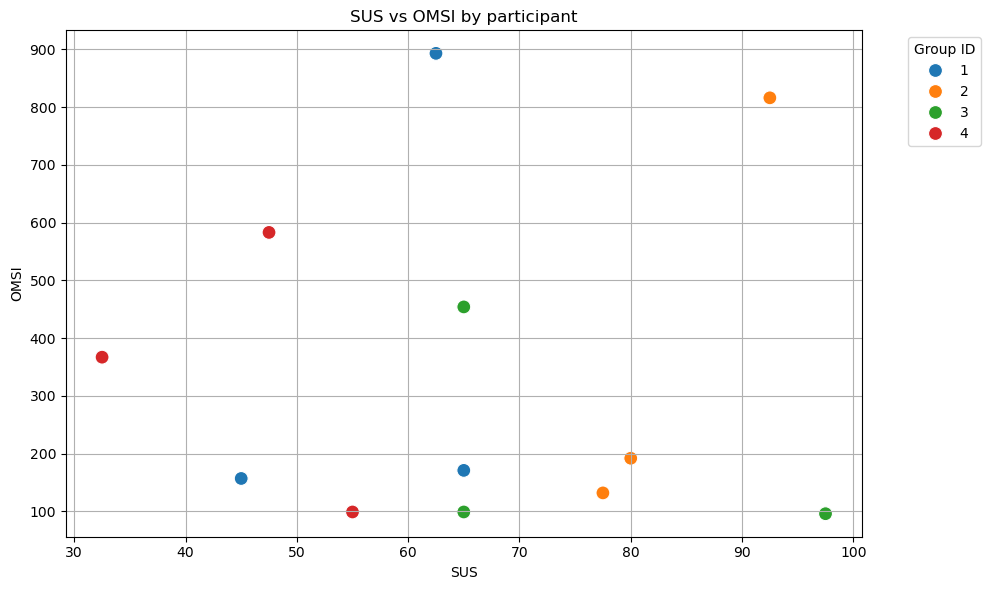

In [ ]:

# Plot
plt.figure(figsize=(10, 6))

# Lines first
#sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', linewidth=2)

# Points on top
sns.scatterplot(data=SUS_omsi, x='SUS', y='OMSI', hue='Group Id', palette='tab10', s=100)
plt.title("SUS vs OMSI by participant")
plt.ylabel("OMSI")
plt.xlabel("SUS")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


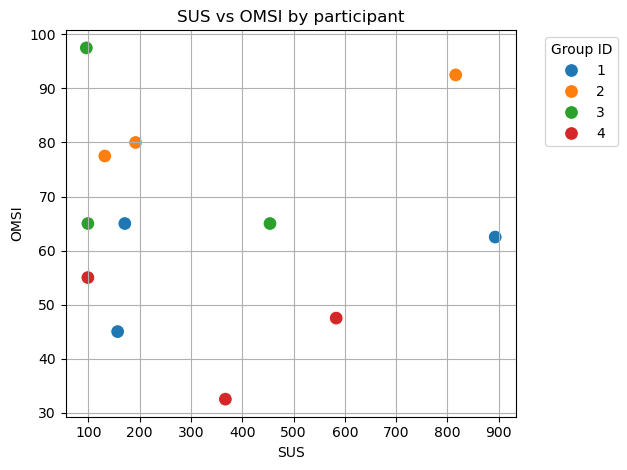

In [ ]:
# Points on top
sns.scatterplot(data=SUS_omsi, x='OMSI', y='SUS', hue='Group Id', palette='tab10', s=100)
plt.title("SUS vs OMSI by participant")
plt.ylabel("SUS")
plt.xlabel("OMSI")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

**5 Point Likert Scale - Post Questionnaire**

/tmp/ipykernel_10052/451278125.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


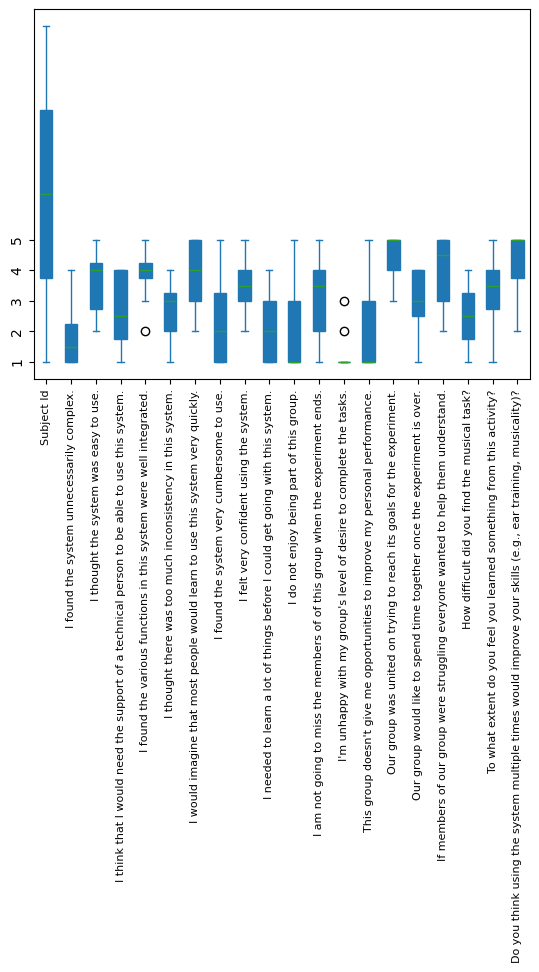

In [77]:
data_likert = data_afterquestionnaire.replace({"Strongly Disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly Agree": 5})

# drops collums that are not needed

data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[20]])


# plotting options
ax = data_likert.plot.box(patch_artist=True) 

# Create a colormap
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(data_likert.columns))]

# Assign colors to each box
for patch, color in zip(ax.artists, colors):
    patch.set_facecolor(color)
ax.set_yticks([1, 2, 3, 4, 5])
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

### Task completement

/tmp/ipykernel_10052/2504210182.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')


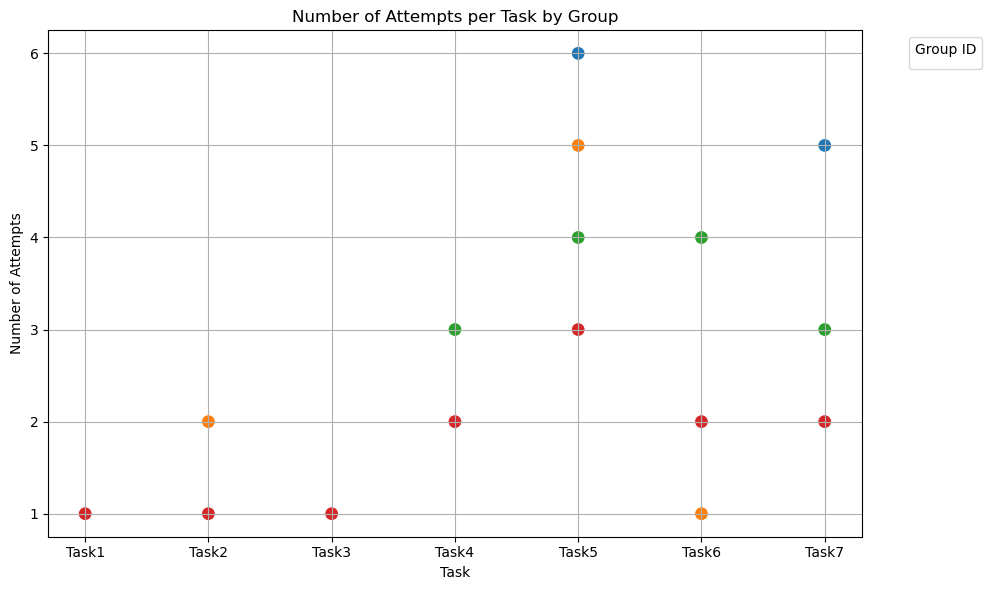

In [81]:
# Extract the task columns
task_cols = ['Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7']

# Melt the dataframe to long format
df_long = data_beforequestionnaire.melt(id_vars=['Group Id'], value_vars=task_cols,
                  var_name='Task', value_name='Attempts')

# Plot
plt.figure(figsize=(10, 6))

# Lines first
#sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', linewidth=2)

# Points on top
sns.scatterplot(data=df_long, x='Task', y='Attempts', hue='Group Id', palette='tab10', s=100, legend=False)
plt.title("Number of Attempts per Task by Group")
plt.ylabel("Number of Attempts")
plt.xlabel("Task")
plt.legend(title='Group ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


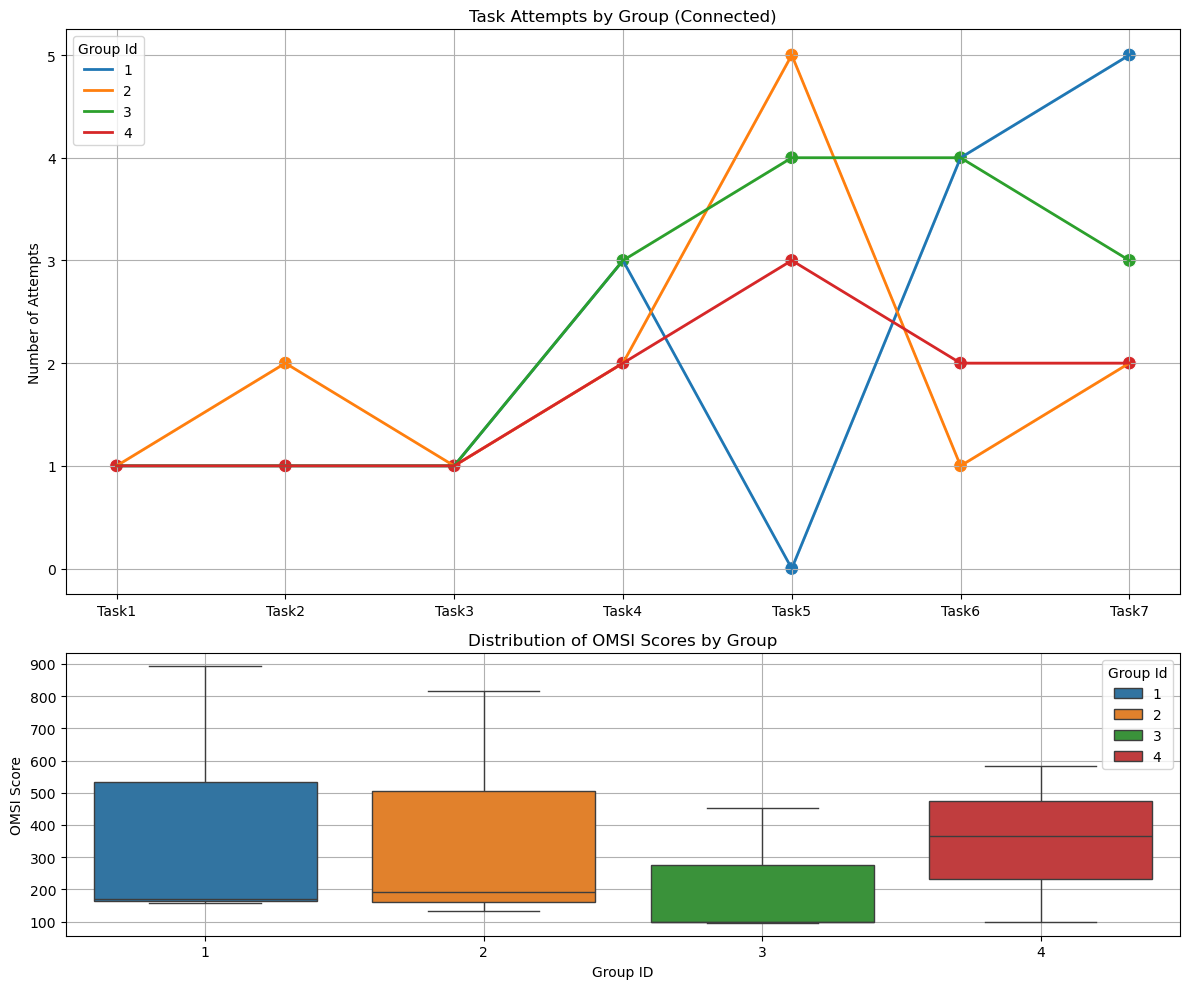

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -- SCATTER + LINE PLOT PART --

# Prepare task columns
# Extract the task columns
task_cols = ['Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7']

# Melt the dataframe to long format
df_long = data_beforequestionnaire.melt(id_vars=['Group Id'], value_vars=task_cols,
                  var_name='Task', value_name='Attempts')

# Plot
df_long['Task'] = pd.Categorical(df_long['Task'], categories=task_cols, ordered=True)

# -- PLOT BOTH TOGETHER --
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

# Top: Scatter + Line plot
sns.lineplot(data=df_long, x='Task', y='Attempts', hue='Group Id',
             palette='tab10', linewidth=2, ax=ax1)
sns.scatterplot(data=df_long, x='Task', y='Attempts', hue='Group Id',
                palette='tab10', s=100, ax=ax1, legend=False)

ax1.set_title("Task Attempts by Group (Connected)")
ax1.set_ylabel("Number of Attempts")
ax1.set_xlabel("")
ax1.grid(True)

# Bottom: Boxplots of OMSI scores
sns.boxplot(data=data_beforequestionnaire, x='Group Id',hue='Group Id', y='OMSI', palette='tab10', ax=ax2)
ax2.set_title("Distribution of OMSI Scores by Group")
ax2.set_xlabel("Group ID")
ax2.set_ylabel("OMSI Score")
ax2.grid(True)

plt.tight_layout()
plt.show()


**Post Questionnaire - OMS Score**

In [56]:
merged

,Subject Id,Group Id,Age,Gender,Nationality,OMSI,Task1,Task2,Task3,Task4,...,I am not going to miss the members of of this group when the experiment ends.,I'm unhappy with my group's level of desire to complete the tasks.,This group doesn't give me opportunities to improve my personal performance.,Our group was united on trying to reach its goals for the experiment.,Our group would like to spend time together once the experiment is over.,If members of our group were struggling everyone wanted to help them understand.,How difficult did you find the musical task?,To what extent do you feel you learned something from this activity?,"Do you think using the system multiple times would improve your skills (e.g., ear training, musicality)?",Any further feedback you'd like to add?
0,1,1,27,Female,China,157,1,1,1,3,...,4,3,3,4,1,4,4,3,4,NaN
1,2,1,33,Male,British,893,1,1,1,3,...,1,1,1,5,3,5,4,4,5,no
2,3,1,25,Female,Polish,171,1,1,1,3,...,2,1,4,5,3,3,4,3,5,NaN
3,4,2,30,Male,Venezuelan,816,1,2,1,2,...,2,1,1,5,3,4,1,3,5,Excellent idea. As a musician it was very intu...
4,5,2,23,Male,Danish,132,1,2,1,2,...,2,1,1,5,4,5,2,4,5,NaN
5,6,2,25,Female,Danish/Egyptian,192,1,2,1,2,...,5,1,1,5,4,5,3,5,5,"I love it!!!!!! Maybe for future, this could t..."
6,9,3,33,Female,Greek,96,1,1,1,3,...,5,1,1,5,1,5,1,5,5,NaN
7,8,3,33,Male,Northern irish,99,1,1,1,3,...,3,1,1,5,3,5,2,1,5,I would like the latency improved and a left h...
8,7,3,34,Male,Danish,454,1,1,1,3,...,4,1,3,4,3,2,2,1,3,NaN
9,10,4,24,Male,Danish,99,1,1,1,2,...,4,1,2,4,1,2,3,4,4,NaN


In [ ]:
sns.barplot(data=merged, x='OMSI', y='EarTrainingConfidence', hue='Time')
plt.title("Confidence in Ear Training: Musicians vs Non-Musicians")
plt.show()
